# <center>Kaggle's [Loan](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set) Dataset</center>
#### <center>by Hector Cadeaux</center>

### <center>Data Dictionary</center>
* **Gender**: Female/Male/Nan<br>
* **Married**: Yes/No<br>
* **Dependents**: 0, 1, 2, 3+ (to be recoded)<br>
* **Education**: Graduate/Not Graduate<br>
* **Self_Employed**: Whether an applicant is self-employeed<br>
* **Applicant_Income**: Amount of applicant income<br>
* **Coapplicant_Income**: Amount of co-applicant income<br>
* **Loan_Amount**: Amount of loan<br>
* **Term**: Length of the loan<br>
* **Credit_History**: Whether the applicant has a history of paying back a loan<br>
* **Area**: Urban, Semiurban and Rural<br>
<br>
<br>
#### Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd


In [5]:
#%load_ext autoreload
#%autoreload 2

In [6]:
loans= pd.read_csv('loan_train.csv')
loans

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [7]:
loans.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [8]:
loans.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Area', 'Status'],
      dtype='object')

In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [10]:
val_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Term',
       'Credit_History', 'Area', 'Status']

In [11]:
for col in val_cols:
    print(loans[col].value_counts())
    print("{} empty cells".format(loans[col].isna().sum()))

Male      489
Female    112
Name: Gender, dtype: int64
13 empty cells
Yes    398
No     213
Name: Married, dtype: int64
3 empty cells
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
15 empty cells
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
0 empty cells
No     500
Yes     82
Name: Self_Employed, dtype: int64
32 empty cells
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Term, dtype: int64
14 empty cells
1.0    475
0.0     89
Name: Credit_History, dtype: int64
50 empty cells
Semiurban    233
Urban        202
Rural        179
Name: Area, dtype: int64
0 empty cells
Y    422
N    192
Name: Status, dtype: int64
0 empty cells


In [12]:
for col in loans.loc[:,~(loans.columns.isin(val_cols))].columns:
    print("{} has {} empty cells".format(col,loans[col].isna().sum()))

Applicant_Income has 0 empty cells
Coapplicant_Income has 0 empty cells
Loan_Amount has 0 empty cells


<Axes: >

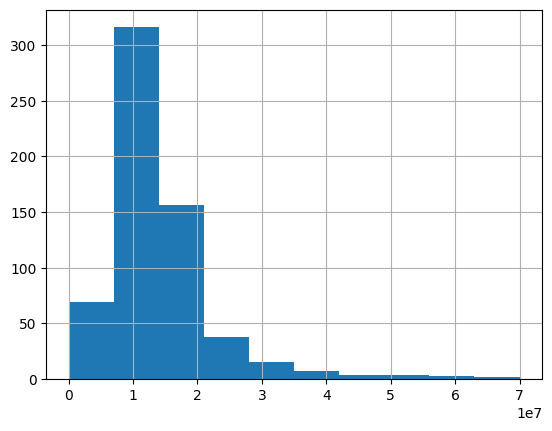

In [13]:
loans["Loan_Amount"].hist()

<Axes: >

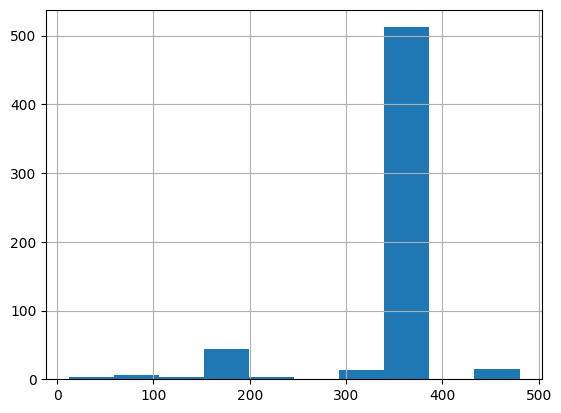

In [14]:
loans["Term"].hist()

<Axes: xlabel='Gender', ylabel='Loan_Amount'>

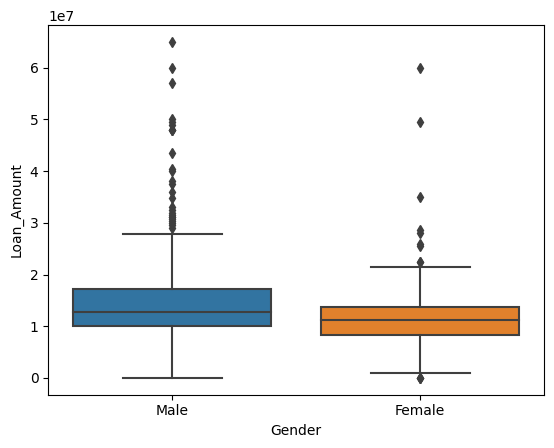

In [15]:
sns.boxplot(data=loans,y="Loan_Amount", x="Gender")

<Axes: xlabel='Gender', ylabel='Applicant_Income'>

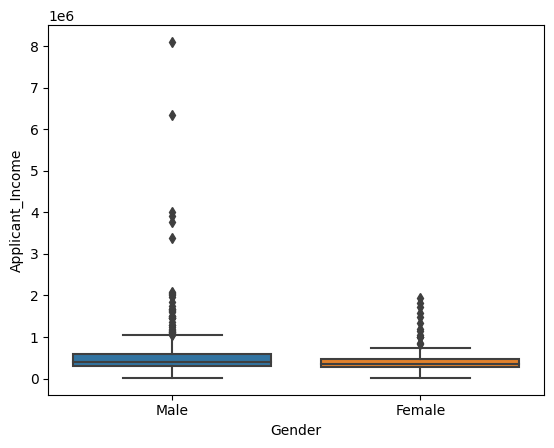

In [16]:
sns.boxplot(data=loans,y="Applicant_Income", x="Gender")

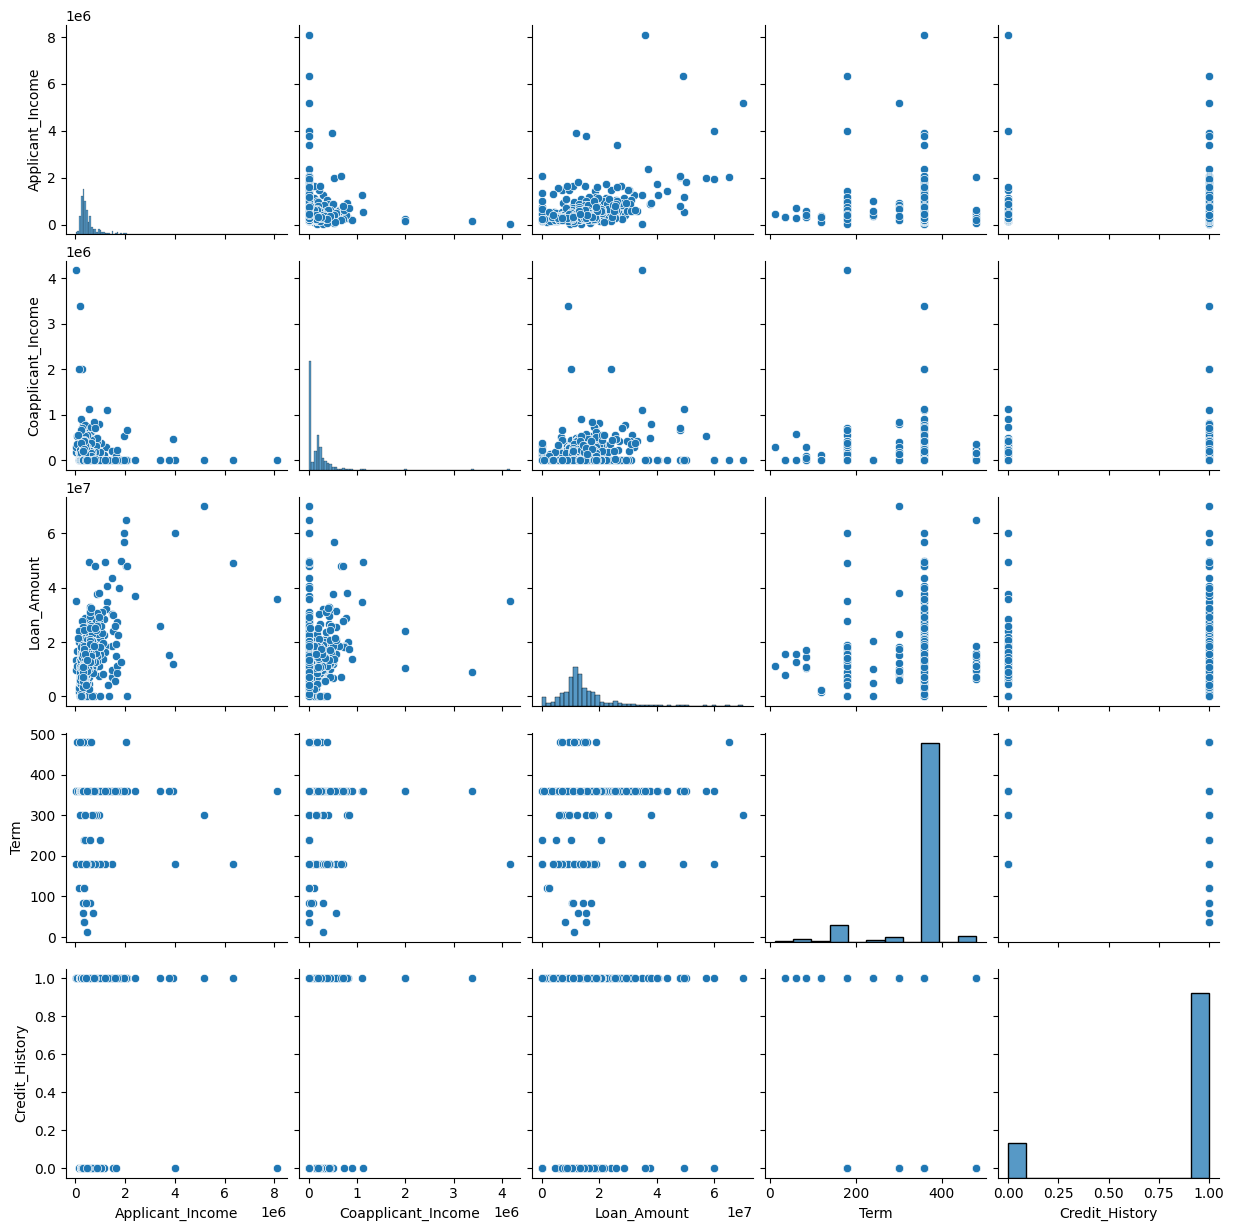

In [17]:
sns.pairplot(loans)

In [18]:
loans[loans["Gender"].isna()]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
23,NaN,Yes,2,Not Graduate,No,336500,191700.0,11200000,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,2380300,0.0,37000000,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,5176300,0.0,70000000,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,67400,529600.0,16800000,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,247300,184300.0,15900000,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,983300,183300.0,18200000,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,208300,408300.0,16000000,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,1669200,0.0,11000000,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,287300,187200.0,13200000,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,358300,0.0,9600000,360.0,1.0,Urban,N


In [19]:
loans[loans["Married"].isna()]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
104,Male,NaN,NaN,Graduate,No,381600,75400.0,16000000,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,475800,0.0,15800000,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,1004700,0.0,0,240.0,1.0,Semiurban,Y


In [20]:
loans[loans["Dependents"].isna()]

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
102,Male,Yes,NaN,Graduate,No,1365000,0.0,0,360.0,1.0,Urban,Y
104,Male,NaN,NaN,Graduate,No,381600,75400.0,16000000,360.0,1.0,Urban,Y
120,Male,Yes,NaN,Graduate,No,566700,266700.0,18000000,360.0,1.0,Rural,Y
226,Male,Yes,NaN,Not Graduate,Yes,473500,0.0,13800000,360.0,1.0,Urban,N
228,Male,NaN,NaN,Graduate,No,475800,0.0,15800000,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,541700,0.0,14300000,480.0,0.0,Urban,N
301,Male,Yes,NaN,Not Graduate,No,287500,175000.0,10500000,360.0,1.0,Semiurban,Y
332,Male,No,NaN,Graduate,No,283300,0.0,7100000,360.0,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,550300,449000.0,7000000,NaN,1.0,Semiurban,Y
346,Male,Yes,NaN,Not Graduate,No,352300,323000.0,15200000,360.0,0.0,Rural,N


In [21]:
loans[["Gender","Education"]].value_counts()

Gender  Education   
Male    Graduate        376
        Not Graduate    113
Female  Graduate         92
        Not Graduate     20
dtype: int64

In [22]:
loans["Status"]= loans["Status"].replace(["Y","N"],[1,0])
loans['Status'].astype(str)
loans

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,1


In [23]:
recode_dict={"Gender":{'Male':"1", 'Female':"0", np.nan:"0"},
                "Married":{'Yes':"1",'No':"0",np.nan:"0"},
				"Dependents":{"3+":"4",np.nan:"2" },#average number of children per family is 2
                "Education":{"Graduate":"1", "Not Graduate":"0"},
				"Self_Employed":{"Yes":"1","No": "0",np.nan:"1"},
				"Term":{np.nan:360},
				"Credit_History":{np.nan:"0"}
                }

#### <center>Recoding and NaNs</center><br>
The preceding was the dictionary I used to recode the dataframe and fill its NaN values. For gender I recoded the males to "1" and females to 0. I used a coin flip to determine the status of the genders. The number of female applicants seemed low, so I recoded the NaNs to female

In [24]:
for key in recode_dict.keys():
    for llave, values in recode_dict[key].items():
        loans[key] = loans[key].replace(llave,values)

In [25]:
loans

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,1,0,584900,0.0,15000000,360.0,1.0,Urban,1
1,1,1,1,1,0,458300,150800.0,12800000,360.0,1.0,Rural,0
2,1,1,0,1,1,300000,0.0,6600000,360.0,1.0,Urban,1
3,1,1,0,0,0,258300,235800.0,12000000,360.0,1.0,Urban,1
4,1,0,0,1,0,600000,0.0,14100000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,290000,0.0,7100000,360.0,1.0,Rural,1
610,1,1,4,1,0,410600,0.0,4000000,180.0,1.0,Rural,1
611,1,1,1,1,0,807200,24000.0,25300000,360.0,1.0,Urban,1
612,1,1,2,1,0,758300,0.0,18700000,360.0,1.0,Urban,1


In [26]:
loans.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [27]:
loan_t = pd.read_csv('loan_test.csv')
loan_t

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,572000,0,11000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,307600,150000,12600000,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,500000,180000,20800000,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,234000,254600,10000000,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,327600,0,7800000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,400900,177700,11300000,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,415800,70900,11500000,360.0,1.0,Urban
364,Male,No,0,Graduate,No,325000,199300,12600000,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,500000,239300,15800000,360.0,1.0,Rural


In [28]:
loan_t.isna().sum()

Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   6
Credit_History        29
Area                   0
dtype: int64

In [29]:
for key in recode_dict.keys():
    for llave, values in recode_dict[key].items():
        loan_t[key] = loan_t[key].replace(llave,values)

In [30]:
loan_t.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term
count,3.670000e+02,3.670000e+02,3.670000e+02,367.000000
mean,4.805599e+05,1.569578e+05,1.342779e+07,342.822888
std,4.910685e+05,2.334232e+05,6.296143e+06,64.658402
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000
25%,2.864000e+05,0.000000e+00,1.000000e+07,360.000000
50%,3.786000e+05,1.025000e+05,1.250000e+07,360.000000
75%,5.060000e+05,2.430500e+05,1.575000e+07,360.000000
max,7.252900e+06,2.400000e+06,5.500000e+07,480.000000


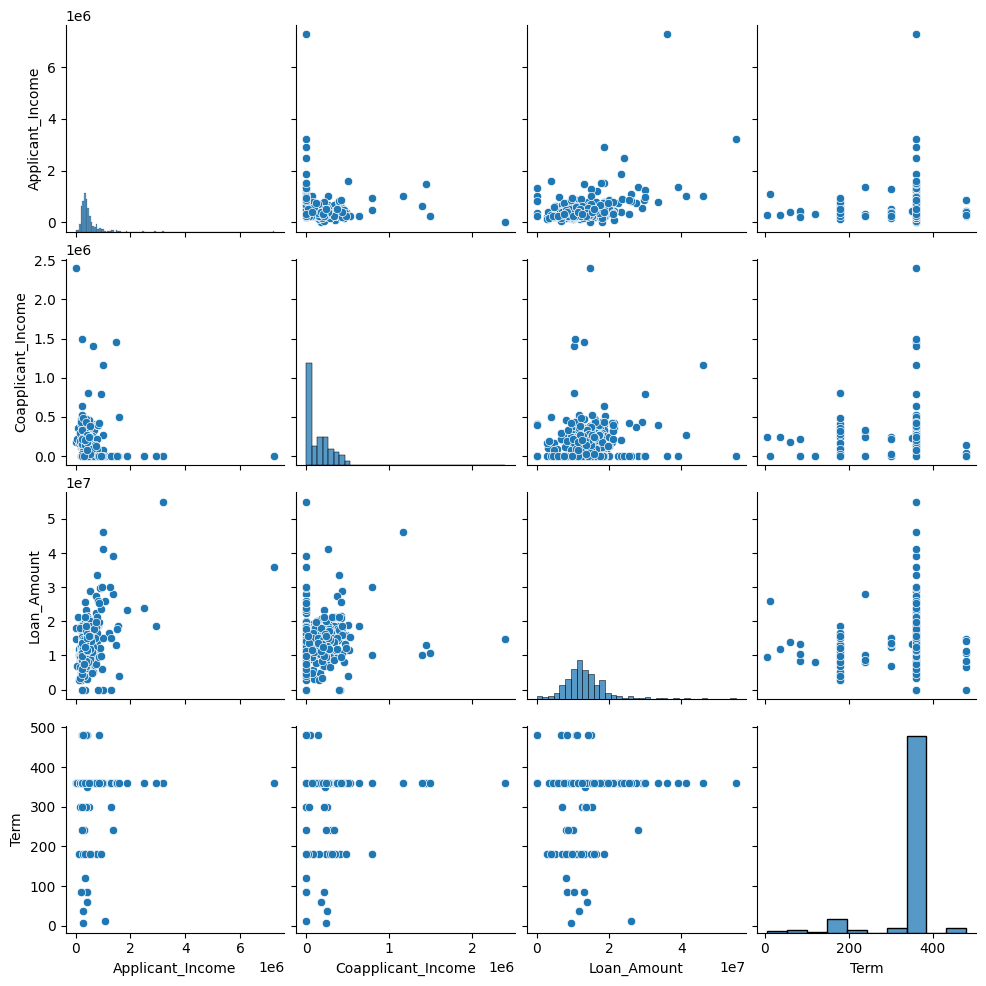

In [31]:
sns.pairplot(loan_t)
plt.show()

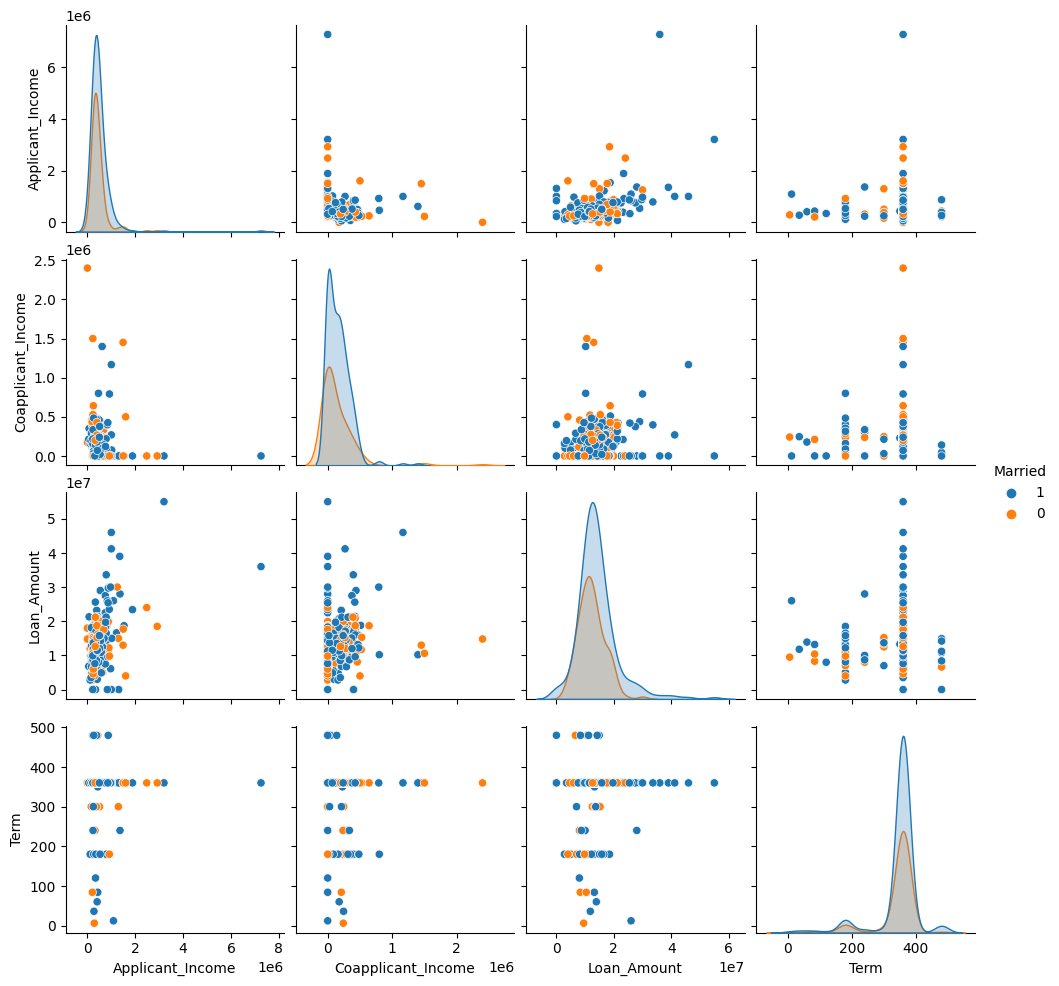

In [32]:
sns.pairplot(loan_t, hue="Married")
plt.show()

In [33]:
loans_C= loans.copy(deep=True)

In [34]:

loan_t = pd.get_dummies(loan_t, columns=["Area"], prefix="Area", prefix_sep="_", drop_first=True)
loans = pd.get_dummies(loans, columns=["Area"], prefix="Area", prefix_sep="_", drop_first=True)


In [35]:
clms= ["Gender","Married", "Dependents", "Education","Self_Employed","Area_Semiurban","Area_Urban","Credit_History"]
for col in clms:
    loans[col]=loans[col].astype('int64')
    loan_t[col]=loan_t[col].astype('int64')

In [36]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    int64  
 1   Married             614 non-null    int64  
 2   Dependents          614 non-null    int64  
 3   Education           614 non-null    int64  
 4   Self_Employed       614 non-null    int64  
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                614 non-null    float64
 9   Credit_History      614 non-null    int64  
 10  Status              614 non-null    int64  
 11  Area_Semiurban      614 non-null    int64  
 12  Area_Urban          614 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 62.5 KB


<Axes: >

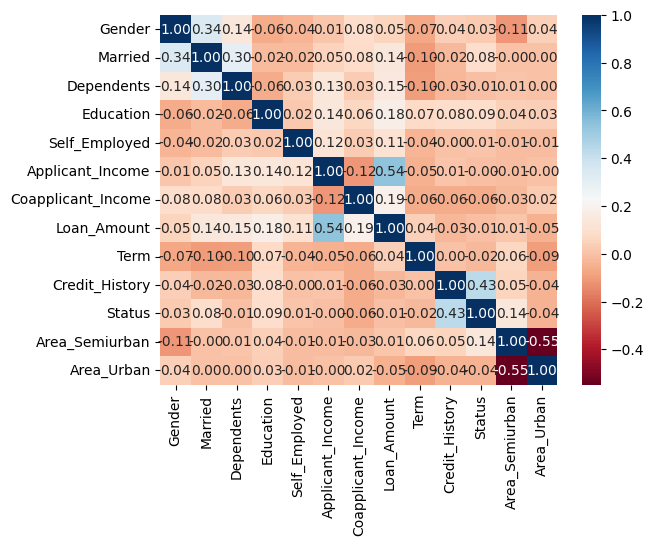

In [37]:

sns.heatmap(loans.corr(),annot=True, fmt='.2f',cmap="RdBu")

In [38]:
loans

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Status,Area_Semiurban,Area_Urban
0,1,0,0,1,0,584900,0.0,15000000,360.0,1,1,0,1
1,1,1,1,1,0,458300,150800.0,12800000,360.0,1,0,0,0
2,1,1,0,1,1,300000,0.0,6600000,360.0,1,1,0,1
3,1,1,0,0,0,258300,235800.0,12000000,360.0,1,1,0,1
4,1,0,0,1,0,600000,0.0,14100000,360.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,290000,0.0,7100000,360.0,1,1,0,0
610,1,1,4,1,0,410600,0.0,4000000,180.0,1,1,0,0
611,1,1,1,1,0,807200,24000.0,25300000,360.0,1,1,0,1
612,1,1,2,1,0,758300,0.0,18700000,360.0,1,1,0,1


In [39]:
loan_t

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area_Semiurban,Area_Urban
0,1,1,0,1,0,572000,0,11000000,360.0,1,0,1
1,1,1,1,1,0,307600,150000,12600000,360.0,1,0,1
2,1,1,2,1,0,500000,180000,20800000,360.0,1,0,1
3,1,1,2,1,0,234000,254600,10000000,360.0,0,0,1
4,1,0,0,0,0,327600,0,7800000,360.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,4,0,1,400900,177700,11300000,360.0,1,0,1
363,1,1,0,1,0,415800,70900,11500000,360.0,1,0,1
364,1,0,0,1,0,325000,199300,12600000,360.0,0,1,0
365,1,1,0,1,0,500000,239300,15800000,360.0,1,0,0


## Linear Regression

In [40]:
#%pip install sklearn

In [41]:
#preparing the dataset with a split into training and validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
y= loans["Status"]
X=loans.loc[:,~loans.columns.isin(["Status"])]
X.columns
trainX, validX, train_y, validy = train_test_split(X,y, test_size=.3, stratify=y, random_state=42)



In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    int64  
 1   Married             614 non-null    int64  
 2   Dependents          614 non-null    int64  
 3   Education           614 non-null    int64  
 4   Self_Employed       614 non-null    int64  
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                614 non-null    float64
 9   Credit_History      614 non-null    int64  
 10  Area_Semiurban      614 non-null    int64  
 11  Area_Urban          614 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 57.7 KB


In [43]:
def col_survey(df,col):
    mean= df[col].mean()
    stdev= df[col].std()
    cv = 100*stdev/mean
    print("{} has a mean of {}, a standard deviation of {} and a CV of {}".format(col,round(mean,2),round(stdev,2), round(cv,2)))


In [40]:

from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(trainX, train_y)
coeff_df = pd.DataFrame(model.coef_,trainX.columns,columns=['Coefficient'])


In [41]:
print(model.intercept_)
coeff_df

0.14900539951260983


,Coefficient
Gender,-1.699863e-02
Married,9.157774e-02
Dependents,1.710292e-02
Education,8.121344e-02
Self_Employed,-2.545172e-02
Applicant_Income,-3.504110e-08
Coapplicant_Income,-4.282994e-08
Loan_Amount,2.536978e-09
Term,4.364415e-05
Credit_History,4.272972e-01


In [42]:
test_X=loan_t.copy(deep=True)
y_pred = model.predict(test_X)

In [43]:
from sklearn.metrics import mean_squared_error
valid_X_lin= validX.copy(deep=True)
vy_pred= model.predict(valid_X_lin)
valid_X_lin["Status"], valid_X_lin['Linear_y']= validy,vy_pred
rmse = np.sqrt(mean_squared_error(validy,vy_pred))
print("RMSE: {}".format(rmse))


RMSE: 0.40391084567109126


In [44]:
loan_tc_lin= loan_t.copy(deep=True)
loan_tc_lin['Status'] = y_pred

(261, 13)


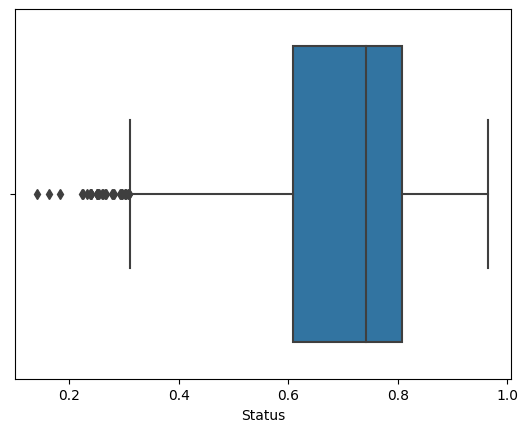

In [45]:
sns.boxplot(data=loan_tc_lin, x="Status")
print(loan_tc_lin[loan_tc_lin["Status"] > .65].shape)
plt.show()

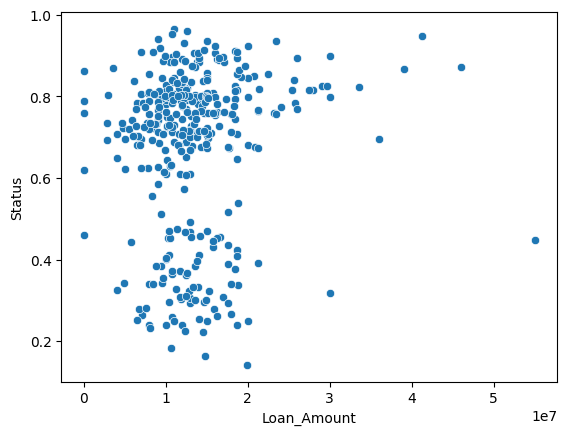

In [46]:
sns.scatterplot(data=loan_tc_lin,x="Loan_Amount", y ='Status')
plt.show()

<Axes: xlabel='Status', ylabel='Linear_y'>

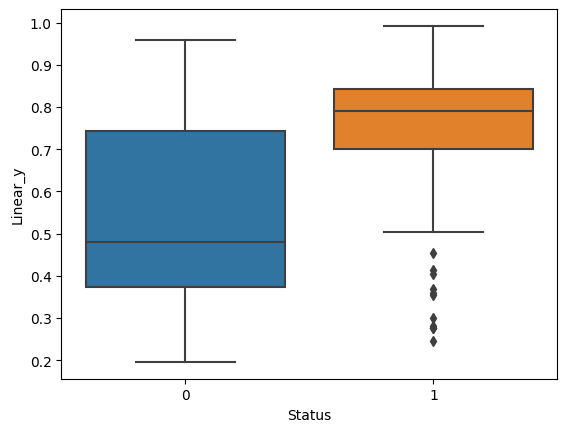

In [47]:
sns.boxplot(data=valid_X_lin, x= "Status", y="Linear_y")

In [48]:
loan_tc_lin.describe()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area_Semiurban,Area_Urban,Status
count,367.000000,367.000000,367.000000,367.000000,367.000000,3.670000e+02,3.670000e+02,3.670000e+02,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.779292,0.634877,0.970027,0.771117,0.163488,4.805599e+05,1.569578e+05,1.342779e+07,342.822888,0.760218,0.316076,0.381471,0.674940
std,0.415290,0.482122,1.310602,0.420687,0.370315,4.910685e+05,2.334232e+05,6.296143e+06,64.658402,0.427533,0.465578,0.486411,0.200216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.000000,0.000000,0.000000,0.142257
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2.864000e+05,0.000000e+00,1.000000e+07,360.000000,1.000000,0.000000,0.000000,0.608295
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3.786000e+05,1.025000e+05,1.250000e+07,360.000000,1.000000,0.000000,0.000000,0.742633
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5.060000e+05,2.430500e+05,1.575000e+07,360.000000,1.000000,1.000000,1.000000,0.807433
max,1.000000,1.000000,4.000000,1.000000,1.000000,7.252900e+06,2.400000e+06,5.500000e+07,480.000000,1.000000,1.000000,1.000000,0.965536


A linear regression is not an appropriate model for classification. It does give a general idea for running a Logistic Regression. Acccording to the linear regression, credit history plays a large role in determining the Status.The marital status and living in a "semiurban" area are the next largest. Loan amounts and applicant and co-applicant income influence the loan status by a much smaller margin.<br>
## Logistic Regression

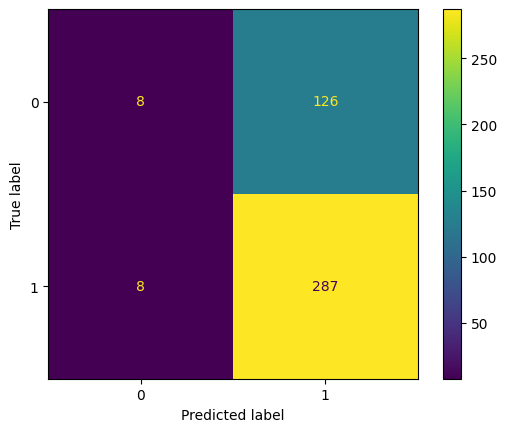

Accuracy: 0.6876456876456877
precision score:  0.6949152542372882
recall score:  0.9728813559322034
f1-score:  0.8107344632768362


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
log_mod= LogisticRegression()
log_mod.fit(trainX, train_y)
lr_tr_pred = log_mod.predict(trainX)
cm_log_tr= confusion_matrix(train_y,lr_tr_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_log_tr, display_labels=log_mod.classes_).plot()
plt.show()
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
print("Accuracy:",accuracy_score(train_y, lr_tr_pred ))
print("precision score: ", precision_score(train_y,lr_tr_pred ))
print("recall score: ", recall_score(train_y,lr_tr_pred ))
print("f1-score: ", f1_score(train_y,lr_tr_pred ))

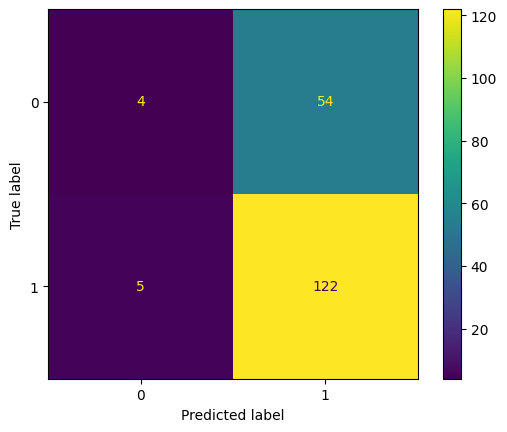

Accuracy: 0.6810810810810811
precision score:  0.6931818181818182
recall score:  0.9606299212598425
f1-score:  0.8052805280528054


In [50]:
valid_pred = log_mod.predict(validX)
cm_log= confusion_matrix(validy,valid_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log_mod.classes_).plot()
plt.show()
print("Accuracy:",accuracy_score(validy, valid_pred))
print("precision score: ", precision_score(validy,valid_pred))
print("recall score: ", recall_score(validy,valid_pred))
print("f1-score: ", f1_score(validy,valid_pred))

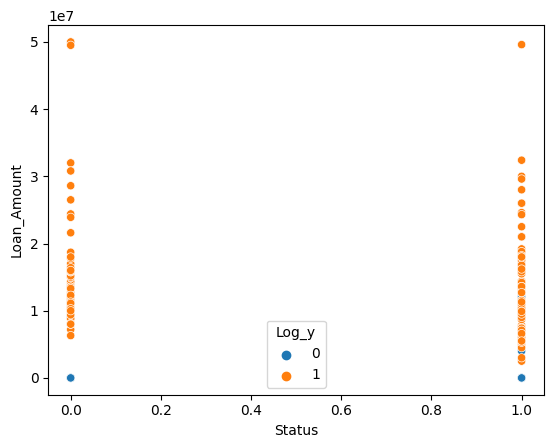

In [51]:
log_valid= validX.copy(deep=True)
log_valid["Status"], log_valid['Log_y'] = validy, valid_pred
sns.scatterplot(data= log_valid, x="Status", y = 'Loan_Amount', hue='Log_y')
plt.show()

In [52]:
#%pip install scikit-plot

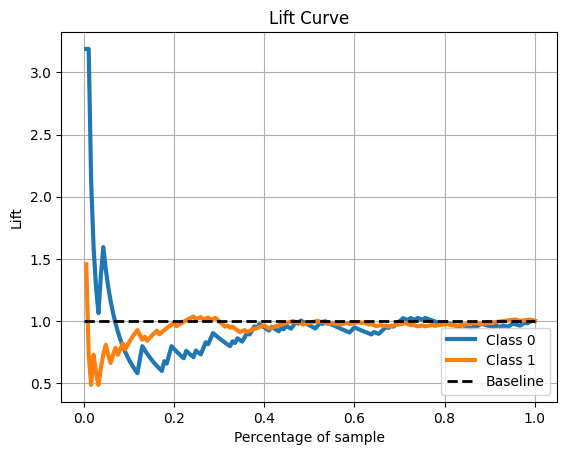

In [53]:
import scikitplot as skplt
y_probas = log_mod.predict_proba(validX) 
skplt.metrics.plot_lift_curve(validy, y_probas) 
plt.show()

In [54]:
loan_T_log = loan_t.copy(deep=True)
loan_T_log["Status"] = log_mod.predict(test_X)
print(loan_T_log["Status"].value_counts())
loan_T_log[loan_T_log["Status"]==0]

1    361
0      6
Name: Status, dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area_Semiurban,Area_Urban,Status
78,1,1,1,1,0,341300,405300,0,360.0,1,1,0,0
101,0,1,0,1,0,226200,0,0,480.0,0,1,0,0
188,1,1,0,0,0,1308300,0,0,360.0,1,0,0,0
247,1,1,2,1,0,1000000,0,0,360.0,1,0,1,0
289,1,1,1,1,0,833300,400000,0,360.0,1,0,1,0
323,1,0,1,1,1,1600000,500000,4000000,360.0,1,1,0,0


## <center>Tree Methods</center>
### <center>Decision Trees</center>

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =4, random_state= 1)
dt.fit(trainX,train_y)

DecisionTreeClassifier(max_depth=4, random_state=1)

Accuracy: 0.7878787878787878
precision score:  0.8128834355828221
recall score:  0.8983050847457628
f1-score:  0.8534621578099839
Accuracy: 0.7621621621621621
precision score:  0.816793893129771
recall score:  0.84251968503937
f1-score:  0.8294573643410853


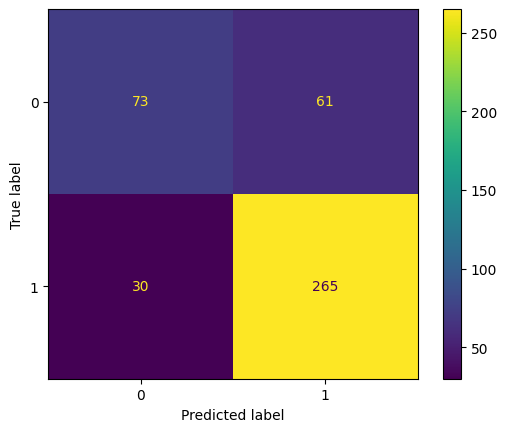

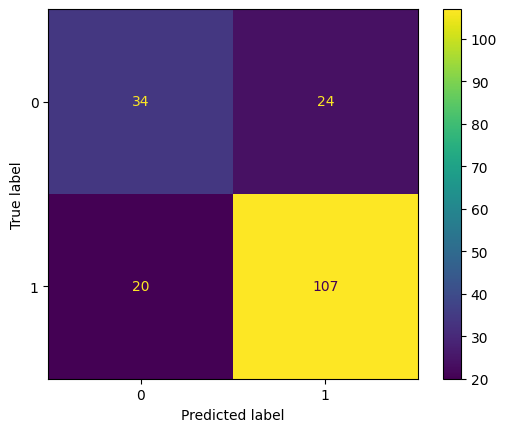

In [56]:
pred_dt_tr= dt.predict(trainX)
print("Accuracy:",accuracy_score(train_y, pred_dt_tr))
print("precision score: ", precision_score(train_y,pred_dt_tr))
print("recall score: ", recall_score(train_y,pred_dt_tr))
print("f1-score: ", f1_score(train_y,pred_dt_tr))
cm_dt_tr= confusion_matrix(train_y,pred_dt_tr)
ConfusionMatrixDisplay(confusion_matrix=cm_dt_tr, display_labels=dt.classes_).plot()
pred_dt= dt.predict(validX)
print("Accuracy:",accuracy_score(validy, pred_dt))
print("precision score: ", precision_score(validy,pred_dt))
print("recall score: ", recall_score(validy,pred_dt))
print("f1-score: ", f1_score(validy,pred_dt))
cm_dt= confusion_matrix(validy,pred_dt)
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.classes_).plot()
plt.show()

In [57]:
loan_T_dt = loan_t.copy(deep=True)
loan_T_dt["Status"] = dt.predict(test_X)
print(loan_T_dt["Status"].value_counts())
loan_T_dt[loan_T_dt["Status"]==0].shape

1    268
0     99
Name: Status, dtype: int64


(99, 13)

In [58]:
imptcs = pd.DataFrame(dt.feature_importances_,trainX.columns, columns=['importances']).sort_values('importances', ascending= False)
imptcs

,importances
Credit_History,0.537532
Loan_Amount,0.180470
Education,0.120099
Term,0.061487
Applicant_Income,0.042250
Coapplicant_Income,0.035916
Dependents,0.022246
Gender,0.000000
Married,0.000000
Self_Employed,0.000000


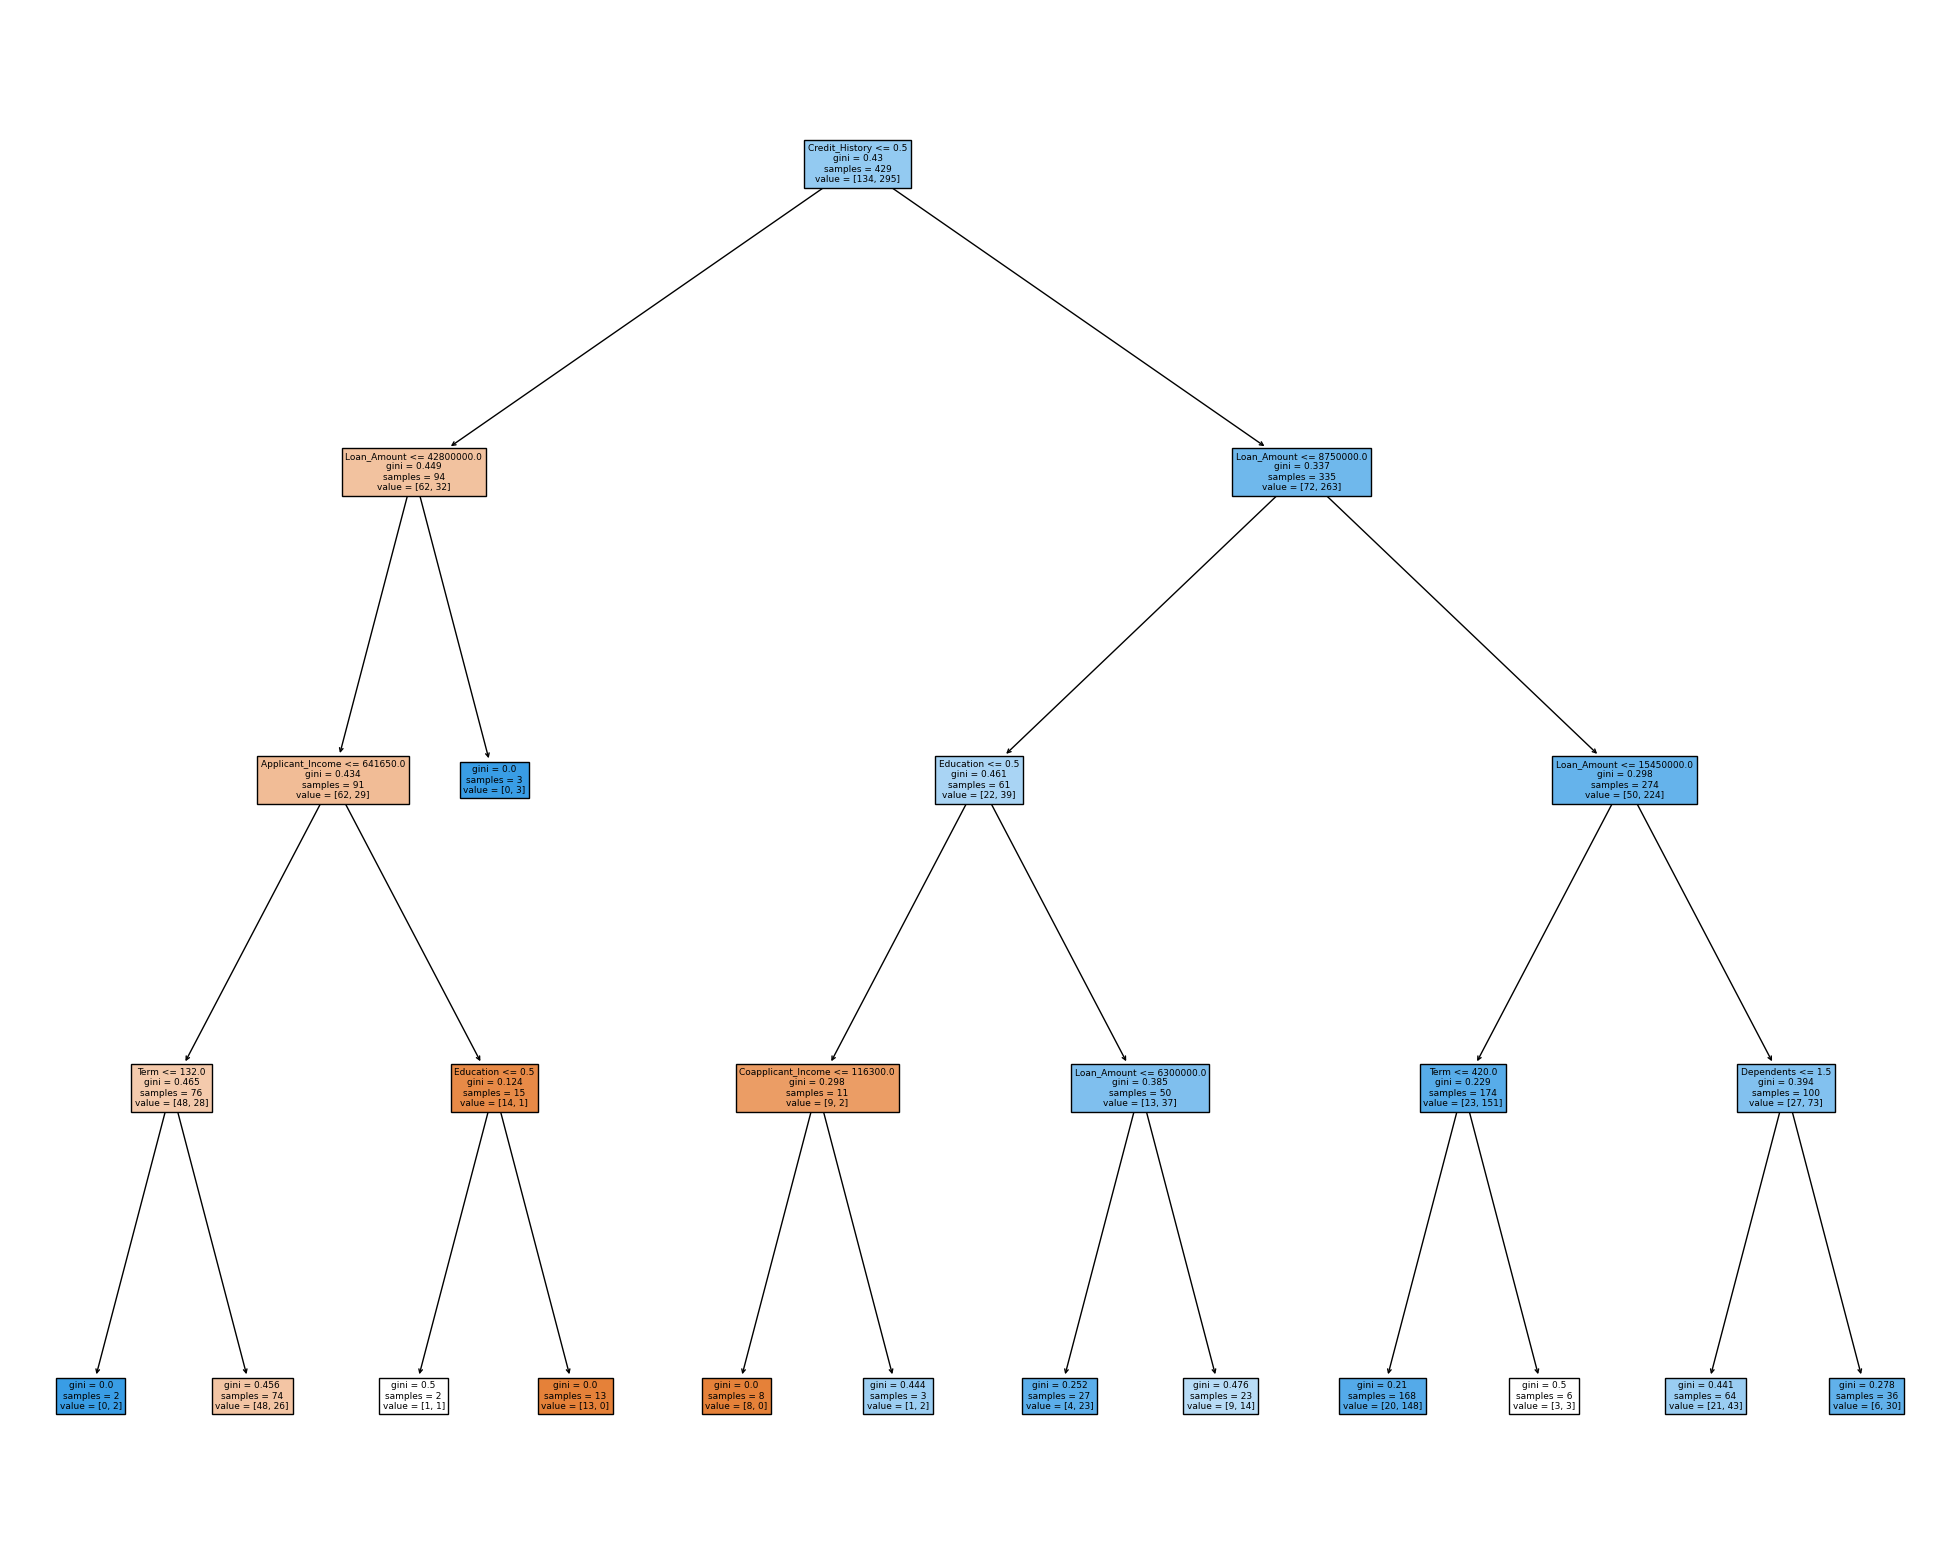

In [59]:
from sklearn.tree import plot_tree
fig= plt.figure(figsize=(25,20))
_ = plot_tree(dt,feature_names=validX.columns,filled=True)

According to the decision tree, the most important factor was the applicant's credit history, which accounts for 58% of the gini importance of the dataset. The next determining factor was the term of the loan, followed by co-applicant income. Gender, marital status, family size, education, self-employment, and, surprisingly, applicant income did not play a part in the decision to grant a loan.<br>

### <center>Random Forest</center>

In [60]:
def train_validate(modle):
    modle.fit(trainX,train_y)
    mod_TT_pred = modle.predict(trainX)
    cm_modle_tr= confusion_matrix(train_y,mod_TT_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm_modle_tr, display_labels=modle.classes_).plot()
    print("Accuracy:",accuracy_score(train_y, mod_TT_pred))
    print("precision score: ", precision_score(train_y,mod_TT_pred))
    print("recall score: ", recall_score(train_y,mod_TT_pred))
    print("f1-score: ", f1_score(train_y,mod_TT_pred))
    modle_v_pred = modle.predict(validX)
    cm_modle_v= confusion_matrix(validy,modle_v_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm_modle_v, display_labels=modle.classes_).plot()
    print("Valid Accuracy:",accuracy_score(validy, modle_v_pred))
    print("Valid precision score: ", precision_score(validy,modle_v_pred))
    print("Valid recall score: ", recall_score(validy,modle_v_pred))
    print("Valid f1-score: ", f1_score(validy,modle_v_pred))
    loan_T_mdl= loan_t.copy(deep=True)
    modle_tt_pred= modle.predict(test_X)
    loan_T_mdl['model_Status']= modle_tt_pred
    print(loan_T_mdl[loan_T_mdl['model_Status']==0]) 

Accuracy: 0.7972027972027972
precision score:  0.7905027932960894
recall score:  0.9593220338983051
f1-score:  0.8667687595712098
Valid Accuracy: 0.7189189189189189
Valid precision score:  0.7300613496932515
Valid recall score:  0.937007874015748
Valid f1-score:  0.8206896551724139
     Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
7         1        1           2          0              0            388100   
12        1        0           4          1              0            416600   
21        0        0           4          0              0            208300   
25        1        0           0          1              0                 0   
45        1        1           0          1              0            426000   
55        1        0           0          1              0            275000   
69        1        1           0          1              0            245800   
82        1        1           2          0              0            413600 

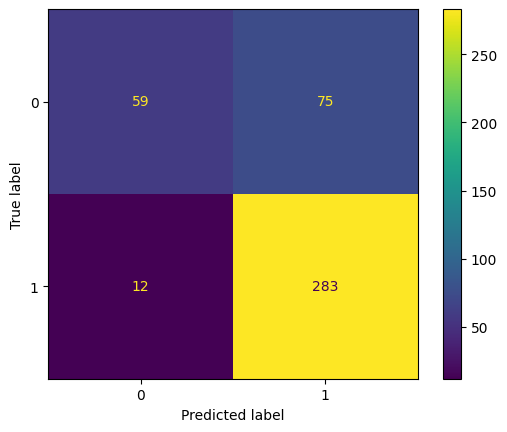

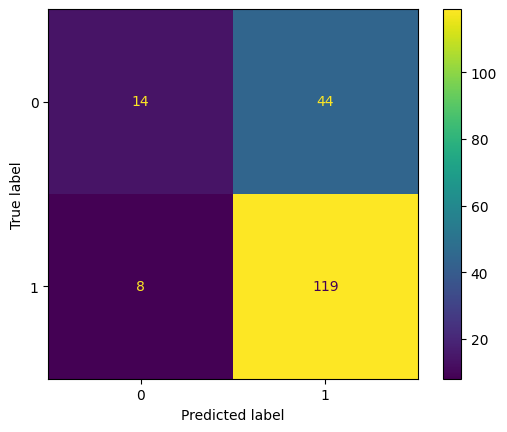

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=4)
train_validate(rfc)

### XGBoost

In [62]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 197 to 267
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              429 non-null    int64  
 1   Married             429 non-null    int64  
 2   Dependents          429 non-null    int64  
 3   Education           429 non-null    int64  
 4   Self_Employed       429 non-null    int64  
 5   Applicant_Income    429 non-null    int64  
 6   Coapplicant_Income  429 non-null    float64
 7   Loan_Amount         429 non-null    int64  
 8   Term                429 non-null    float64
 9   Credit_History      429 non-null    int64  
 10  Area_Semiurban      429 non-null    int64  
 11  Area_Urban          429 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 43.6 KB


Accuracy: 1.0
precision score:  1.0
recall score:  1.0
f1-score:  1.0
Valid Accuracy: 0.6648648648648648
Valid precision score:  0.7480916030534351
Valid recall score:  0.7716535433070866
Valid f1-score:  0.7596899224806201
     Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
4         1        0           0          0              0            327600   
6         0        0           1          0              0            222600   
7         1        1           2          0              0            388100   
12        1        0           4          1              0            416600   
13        1        1           2          1              1           1217300   
..      ...      ...         ...        ...            ...               ...   
347       1        0           0          0              0            286800   
358       1        1           2          0              0            313200   
360       0        1           0          1             

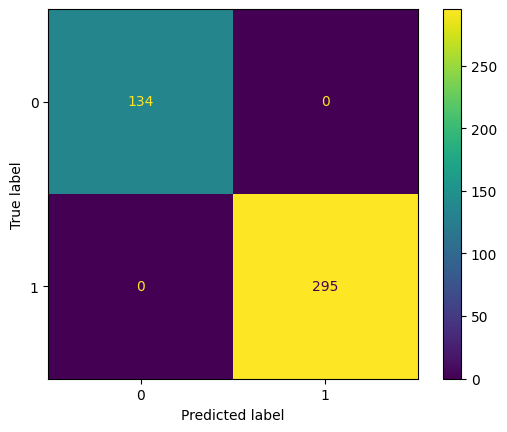

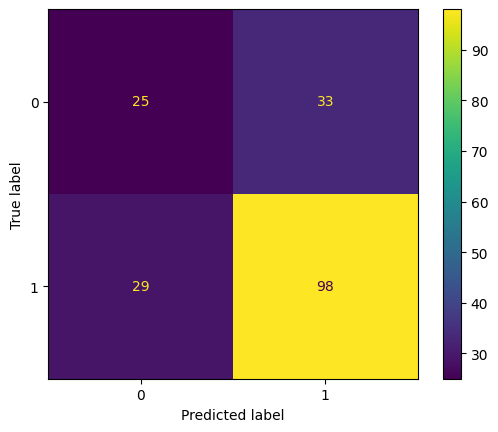

In [63]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
train_validate(xgb)

## <center>Naive Bayes</center>

### Gausian Naive Bayes

Accuracy: 0.6713286713286714
precision score:  0.6878048780487804
recall score:  0.9559322033898305
f1-score:  0.8
Valid Accuracy: 0.6972972972972973
Valid precision score:  0.6983240223463687
Valid recall score:  0.984251968503937
Valid f1-score:  0.8169934640522877
     Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
18        1        1           0          1              0            922600   
25        1        0           0          1              0                 0   
81        1        1           4          1              0           7252900   
85        1        1           2          1              0            463500   
123       1        0           0          1              0            250000   
143       1        1           0          1              1           3200000   
230       1        0           0          1              0           1491100   
237       1        1           2          0              0            616600   
272       1 

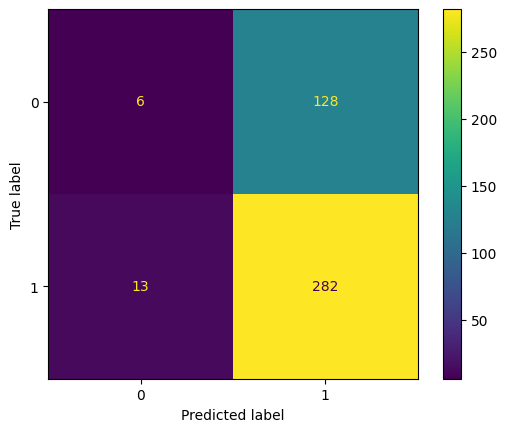

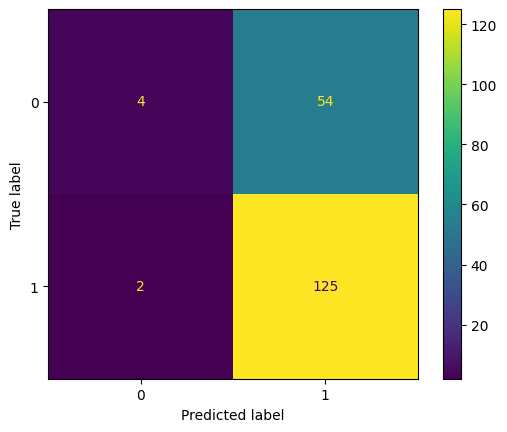

In [64]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
train_validate(gnb)

### Bernoulli Naive Bayes

Accuracy: 0.7599067599067599
precision score:  0.7807017543859649
recall score:  0.9050847457627119
f1-score:  0.8383045525902668
Valid Accuracy: 0.772972972972973
Valid precision score:  0.7814569536423841
Valid recall score:  0.9291338582677166
Valid f1-score:  0.8489208633093526
     Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
3         1        1           2          1              0            234000   
7         1        1           2          0              0            388100   
12        1        0           4          1              0            416600   
23        0        0           0          0              0            376500   
25        1        0           0          1              0                 0   
..      ...      ...         ...        ...            ...               ...   
339       0        0           0          1              0            433300   
346       1        1           0          1              0            339100 

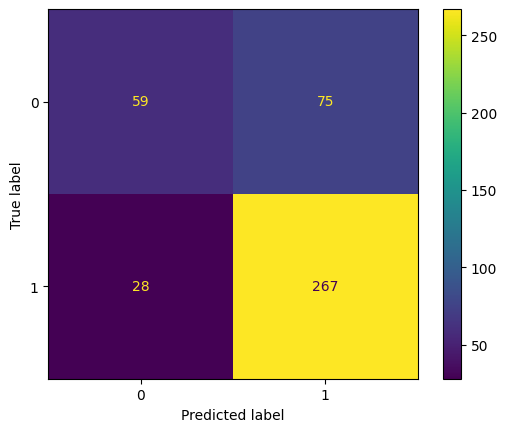

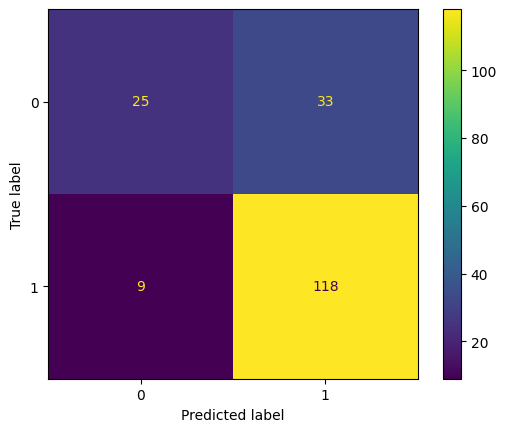

In [65]:
from sklearn.naive_bayes import BernoulliNB
bnb= BernoulliNB()
train_validate(bnb)

### Complement Naive Bayes

Accuracy: 0.5477855477855478
precision score:  0.6771929824561403
recall score:  0.6542372881355932
f1-score:  0.6655172413793103
Valid Accuracy: 0.5297297297297298
Valid precision score:  0.6612903225806451
Valid recall score:  0.6456692913385826
Valid f1-score:  0.6533864541832668
     Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
3         1        1           2          1              0            234000   
12        1        0           4          1              0            416600   
13        1        1           2          1              1           1217300   
18        1        1           0          1              0            922600   
19        1        0           0          1              0            130000   
..      ...      ...         ...        ...            ...               ...   
360       0        1           0          1              0            855000   
361       1        1           1          1              0            226900

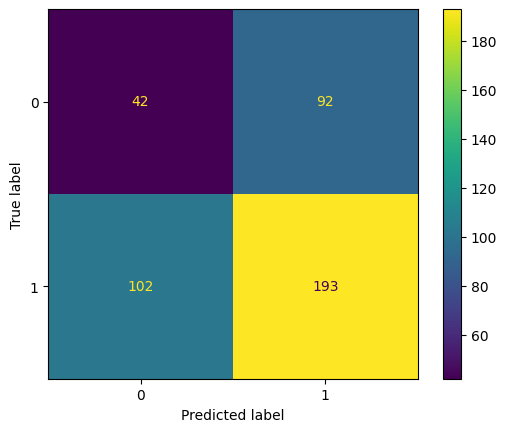

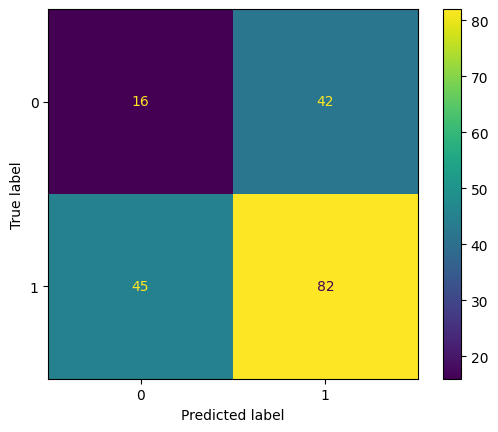

In [66]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
train_validate(cnb)

The Naive Bayes classifiers had trouble with the false negatives.

## <center>Support Vector Classifier</center>

Accuracy: 1.0
precision score:  1.0
recall score:  1.0
f1-score:  1.0
Valid Accuracy: 0.6918918918918919
Valid precision score:  0.6902173913043478
Valid recall score:  1.0
Valid f1-score:  0.8167202572347267
     Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
342       1        1           4          0              0            352200   

     Coapplicant_Income  Loan_Amount   Term  Credit_History  Area_Semiurban  \
342                   0      8100000  180.0               1               0   

     Area_Urban  model_Status  
342           0             0  


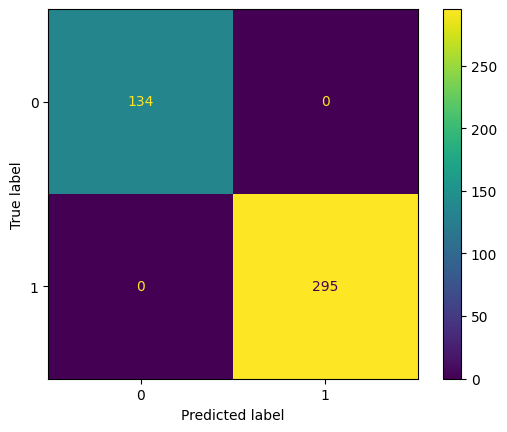

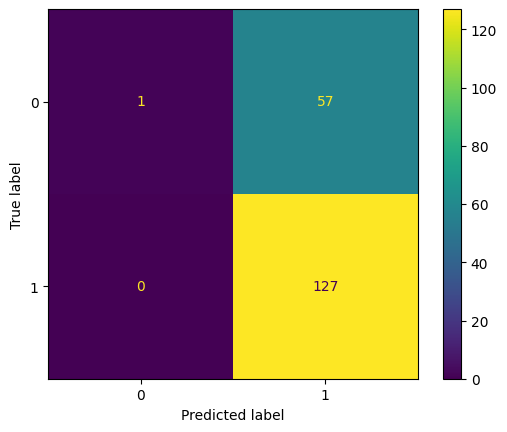

In [67]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
train_validate(svc)

## <center>Neural Net</center>

Accuracy: 0.48484848484848486
precision score:  0.6651785714285714
recall score:  0.5050847457627119
f1-score:  0.5741811175337187
Valid Accuracy: 0.5081081081081081
Valid precision score:  0.7
Valid recall score:  0.49606299212598426
Valid f1-score:  0.5806451612903225
     Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
1         1        1           1          1              0            307600   
2         1        1           2          1              0            500000   
3         1        1           2          1              0            234000   
5         1        1           0          0              1            216500   
7         1        1           2          0              0            388100   
..      ...      ...         ...        ...            ...               ...   
350       1        1           2          1              0            866700   
354       1        1           4          0              0            531600   
359      

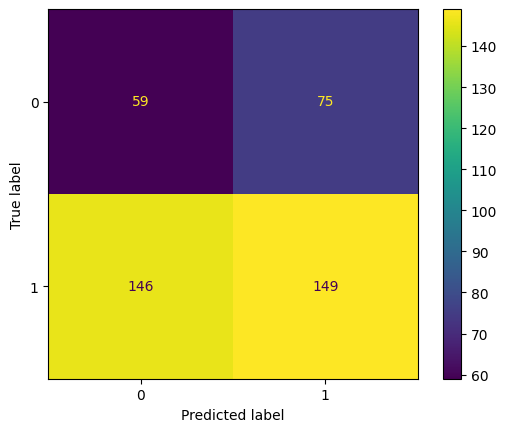

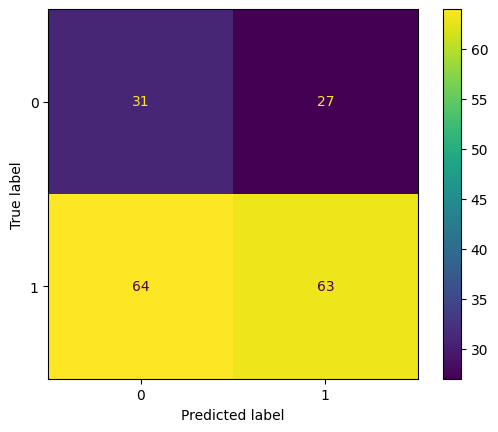

In [68]:
from sklearn.neural_network import MLPClassifier
nn= MLPClassifier()
train_validate(nn)

The neural net preformed abyssimally. This was a surprising result for me. I have used neural nets in other projects and the performance was great. <br>
## Gaussian Process Classifier

Accuracy: 1.0
precision score:  1.0
recall score:  1.0
f1-score:  1.0
Valid Accuracy: 0.31351351351351353
Valid precision score:  0.0
Valid recall score:  0.0
Valid f1-score:  0.0
     Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
0         1        1           0          1              0            572000   
1         1        1           1          1              0            307600   
2         1        1           2          1              0            500000   
3         1        1           2          1              0            234000   
4         1        0           0          0              0            327600   
..      ...      ...         ...        ...            ...               ...   
362       1        1           4          0              1            400900   
363       1        1           0          1              0            415800   
364       1        0           0          1              0            325000   
365       1        1

c:\Users\hec\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


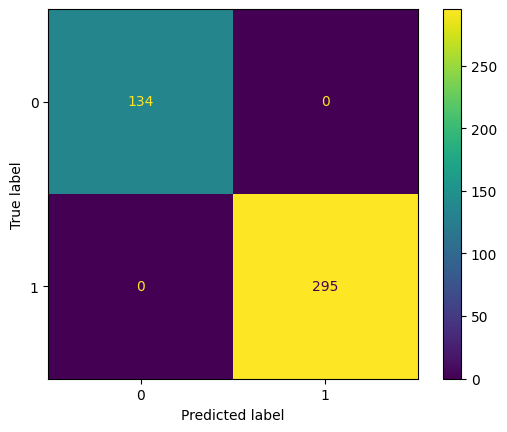

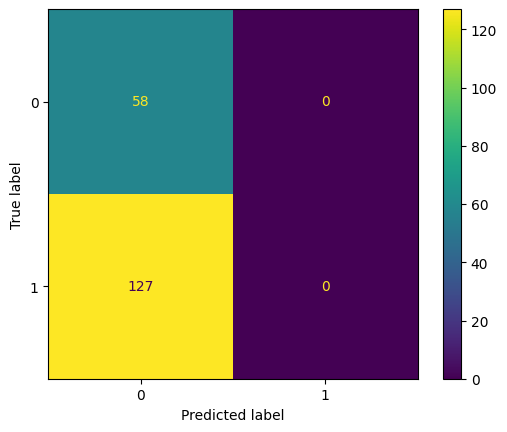

In [69]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier(copy_X_train=False,n_jobs=-1)
train_validate(gpc)

The gaussian process classifier and neural nets had equal performance on the validation sets and will not be used further.

### Feature Engineering

In [70]:
from sklearn.decomposition import PCA
pca = PCA()
x_Train_pca = pca.fit_transform(trainX)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
n_components = np.argmax(cumulative_var >= 0.95) + 1
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(trainX)
X_valid_pca = pca.transform(validX)
X_test_pca = pca.transform(test_X)

In [71]:
def pca_train_validate(modle):
    modle.fit(X_train_pca,train_y)
    mod_TT_pred = modle.predict(X_train_pca)
    cm_modle_tr= confusion_matrix(train_y,mod_TT_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm_modle_tr, display_labels=modle.classes_).plot()
    print("Accuracy:",accuracy_score(train_y, mod_TT_pred))
    print("precision score: ", precision_score(train_y,mod_TT_pred))
    print("recall score: ", recall_score(train_y,mod_TT_pred))
    print("f1-score: ", f1_score(train_y,mod_TT_pred))
    modle_v_pred = modle.predict(X_valid_pca)
    cm_modle_v= confusion_matrix(validy,modle_v_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm_modle_v, display_labels=modle.classes_).plot()
    print("Valid Accuracy:",accuracy_score(validy, modle_v_pred))
    print("Valid precision score: ", precision_score(validy,modle_v_pred))
    print("Valid recall score: ", recall_score(validy,modle_v_pred))
    print("Valid f1-score: ", f1_score(validy,modle_v_pred))
    loan_T_mdl= loan_t.copy(deep=True)
    modle_tt_pred= modle.predict(X_test_pca)
    loan_T_mdl['model_Status']= modle_tt_pred
    print(loan_T_mdl[loan_T_mdl['model_Status']==0]) 

In [72]:
models = {'Logistic regression':log_mod,'Decision Tree':dt, "Gaussian Naive Bayes": gnb,
          "Support Vector Classifier":svc, "Bernoulli Naive Bayes":bnb, 'Gaussian Process': gpc,
            'Neural Net':nn, 'Random Forest':rfc, "XGBoost":xgb}

Logistic regression

Accuracy: 0.4195804195804196
precision score:  0.6493506493506493
recall score:  0.3389830508474576
f1-score:  0.44543429844098
Valid Accuracy: 0.41621621621621624
Valid precision score:  0.6610169491525424
Valid recall score:  0.30708661417322836
Valid f1-score:  0.41935483870967744
     Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
0         1        1           0          1              0            572000   
1         1        1           1          1              0            307600   
3         1        1           2          1              0            234000   
4         1        0           0          0              0            327600   
6         0        0           1          0              0            222600   
..      ...      ...         ...        ...            ...               ...   
361       1        1           1          1              0            226900   
362       1        1           4          0           

c:\Users\hec\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7365967365967366
precision score:  0.7275
recall score:  0.9864406779661017
f1-score:  0.837410071942446
Valid Accuracy: 0.6378378378378379
Valid precision score:  0.6764705882352942
Valid recall score:  0.905511811023622
Valid f1-score:  0.7744107744107743
     Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  \
4         1        0           0          0              0            327600   
30        0        0           0          0              0            247800   
71        1        0           0          1              0            446300   
78        1        1           1          1              0            341300   
88        1        0           2          0              0            323500   
98        1        1           4          1              0            971900   
117       1        1           1          1              0            151600   
120       1        0           0          1              0            312500   
128       

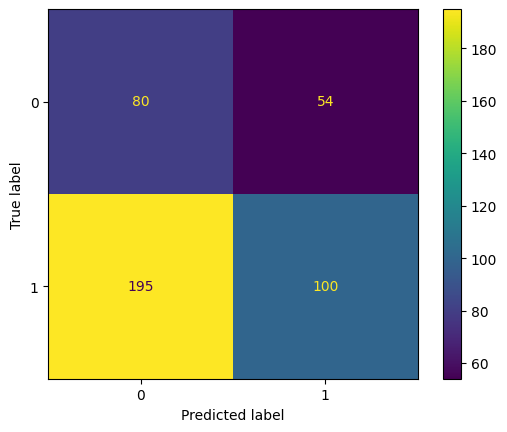

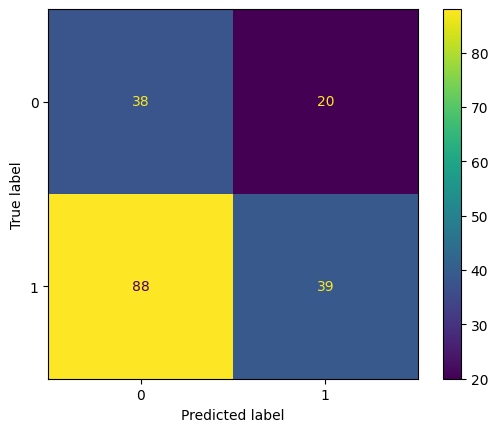

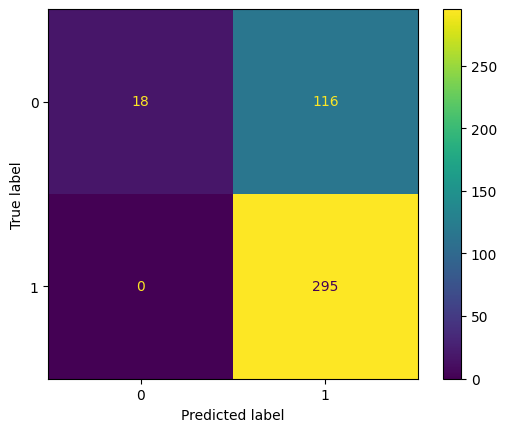

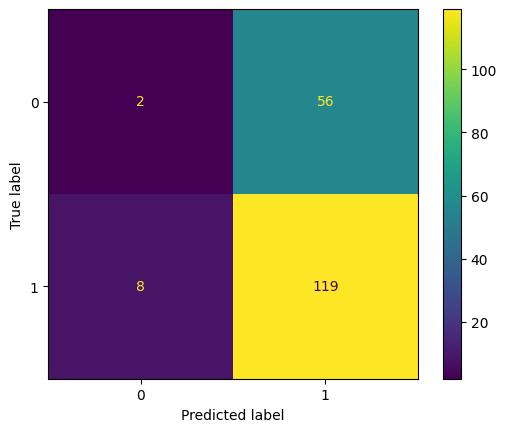

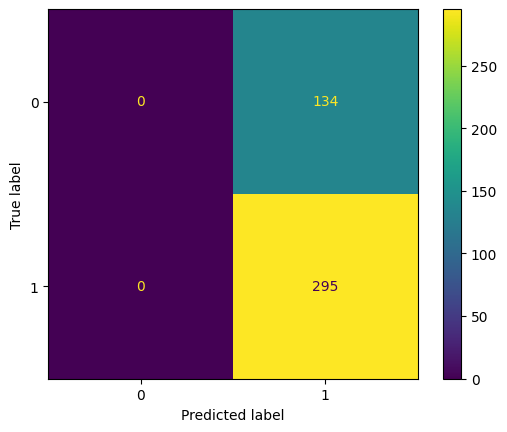

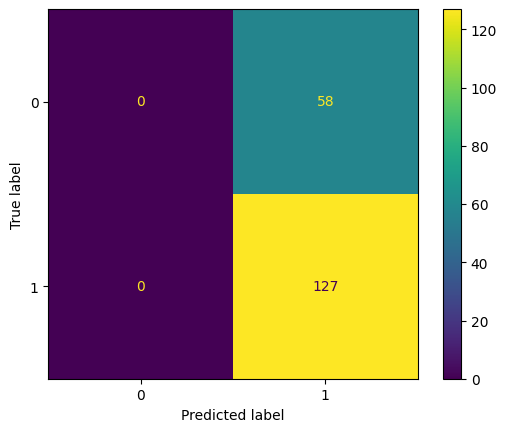

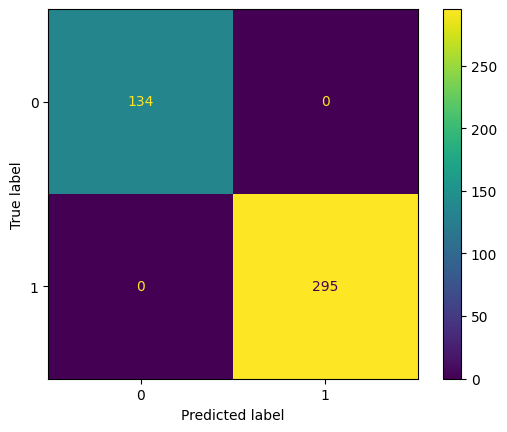

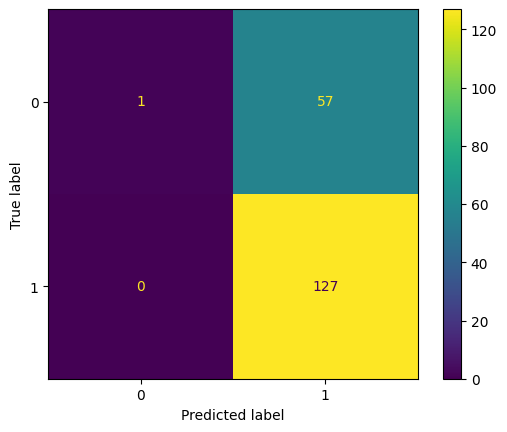

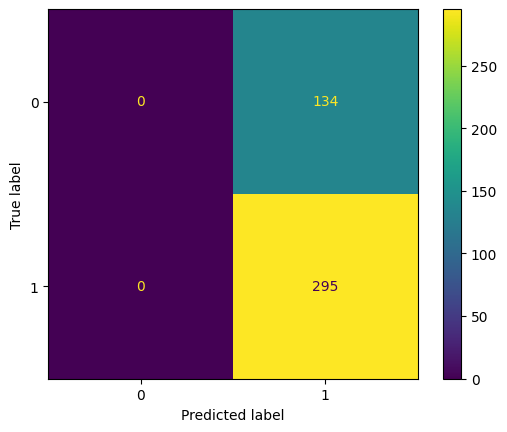

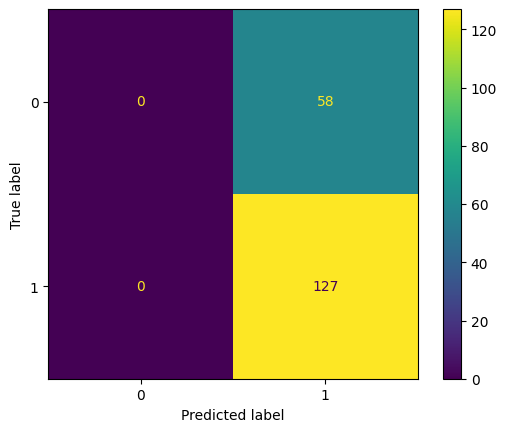

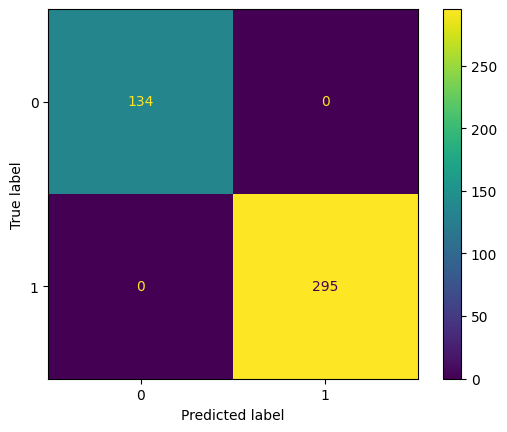

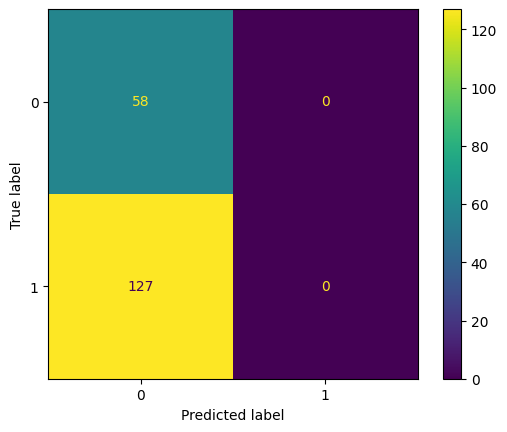

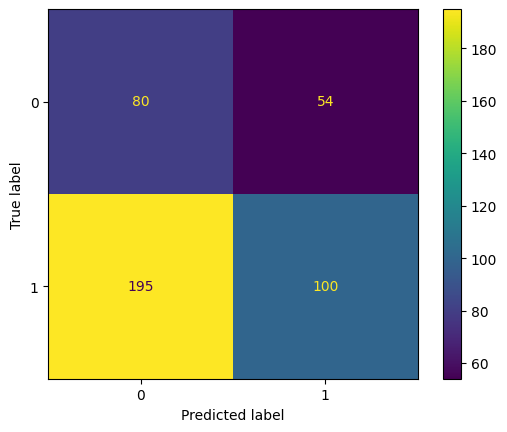

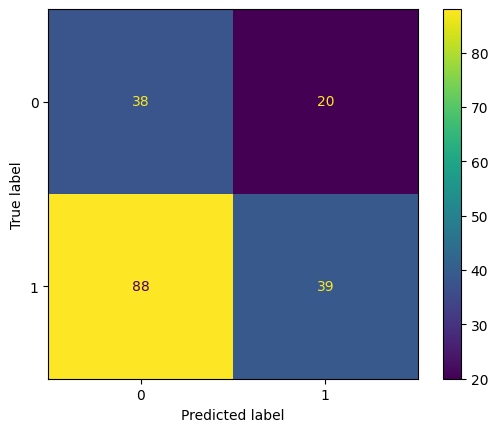

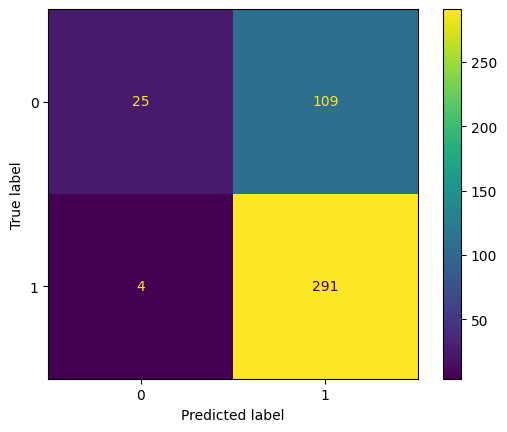

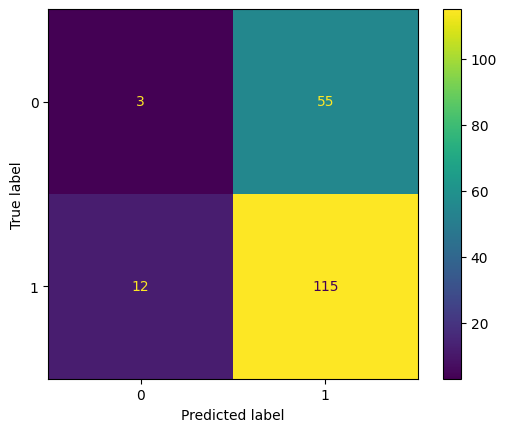

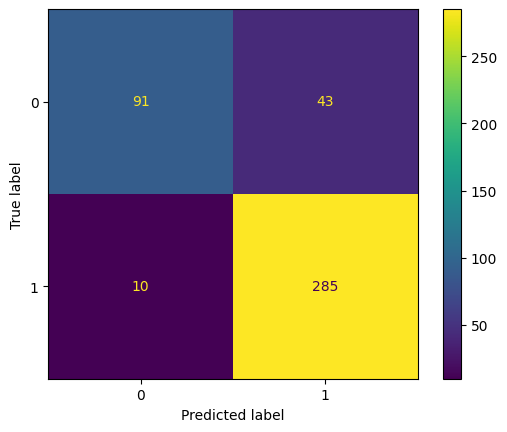

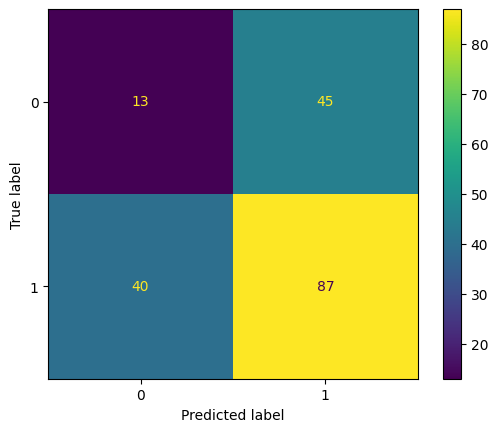

In [73]:
for k, v in models.items():
    print(k+'\n')
    pca_train_validate(v)
    print('\n\n')

In [74]:
#%pip install featuretools

The plain decision tree performed best, therefore I will perform a grid search utilizing a decision tree classifier to find the best parameters.
## <center>Hyperparameters: Grid Search for Decision Tree Classifier and Bernoulli Naive Bayes</center>

In [75]:
class_Wgt=[{0:8,1:7},{0:4,1:3},{0:16,1:7},{0:2,1:1},{0:1,1:1},{0:100,1:1}]
grid_param = {'max_depth':[3,4,5,6,7],
              'min_samples_split':[2,5,10],
              'min_samples_leaf':[1,2,5,7,10],
              'max_features':[None,'sqrt','log2'],
              'class_weight':class_Wgt}

In [77]:
from sklearn.model_selection import GridSearchCV
dt_gs=DecisionTreeClassifier()
clf= GridSearchCV(dt_gs,grid_param, verbose=5)
clf.fit(X,y)


Fitting 5 folds for each of 1350 candidates, totalling 6750 fits
[CV 1/5] END class_weight={0: 8, 1: 7}, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.780 total time=   0.0s
[CV 2/5] END class_weight={0: 8, 1: 7}, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.707 total time=   0.0s
[CV 3/5] END class_weight={0: 8, 1: 7}, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.715 total time=   0.0s
[CV 4/5] END class_weight={0: 8, 1: 7}, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.772 total time=   0.0s
[CV 5/5] END class_weight={0: 8, 1: 7}, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2;, score=0.787 total time=   0.0s
[CV 1/5] END class_weight={0: 8, 1: 7}, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=5;, score=0.780 total time=   0.0s
[CV 2/5] END class_weight={0: 8, 1: 7}, max_depth=3, max_features

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 8, 1: 7}, {0: 4, 1: 3},
                                          {0: 16, 1: 7}, {0: 2, 1: 1},
                                          {0: 1, 1: 1}, {0: 100, 1: 1}],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             verbose=5)

In [78]:
print(clf.best_params_)
clf.best_score_

{'class_weight': {0: 8, 1: 7}, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


0.7590297214447554

The preceding was run prior to stratifying the dataset. A grid search will be run on The Bernoulli Naive Bayes algorithm

In [81]:
bnb_params={'alpha': [0.1, 0.5, 1.0, 1.5],
              'binarize': [0.0, 0.1, 0.2, 0.3],
              'fit_prior': [True, False],
              'class_prior': [None, [0.25, 0.75], [0.5, 0.5]]}
bnb_gs = BernoulliNB()
gs_estim = GridSearchCV(bnb_gs,bnb_params)
gs_estim.fit(X,y)
print(gs_estim.best_params_)
print(gs_estim.best_score_)

{'alpha': 0.1, 'binarize': 0.0, 'class_prior': [0.25, 0.75], 'fit_prior': True}
0.7655071304811409


In [79]:
loans.Status.value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Status, dtype: float64

In [44]:
#train/validate
for colm in loans.columns:
    col_survey(loans,colm)

Gender has a mean of 0.8, a standard deviation of 0.4 and a CV of 50.6
Married has a mean of 0.65, a standard deviation of 0.48 and a CV of 73.73
Dependents has a mean of 0.88, a standard deviation of 1.22 and a CV of 139.1
Education has a mean of 0.78, a standard deviation of 0.41 and a CV of 52.88
Self_Employed has a mean of 0.19, a standard deviation of 0.39 and a CV of 209.6
Applicant_Income has a mean of 540345.93, a standard deviation of 610904.17 and a CV of 113.06
Coapplicant_Income has a mean of 162124.58, a standard deviation of 292624.84 and a CV of 180.49
Loan_Amount has a mean of 14141042.35, a standard deviation of 8815682.46 and a CV of 62.34
Term has a mean of 342.41, a standard deviation of 64.43 and a CV of 18.82
Credit_History has a mean of 0.77, a standard deviation of 0.42 and a CV of 54.14
Status has a mean of 0.69, a standard deviation of 0.46 and a CV of 67.51
Area_Semiurban has a mean of 0.38, a standard deviation of 0.49 and a CV of 127.98
Area_Urban has a mea

In [45]:
#test
for colm in loan_t.columns:
    col_survey(loan_t,colm)

Gender has a mean of 0.78, a standard deviation of 0.42 and a CV of 53.29
Married has a mean of 0.63, a standard deviation of 0.48 and a CV of 75.94
Dependents has a mean of 0.97, a standard deviation of 1.31 and a CV of 135.11
Education has a mean of 0.77, a standard deviation of 0.42 and a CV of 54.56
Self_Employed has a mean of 0.16, a standard deviation of 0.37 and a CV of 226.51
Applicant_Income has a mean of 480559.95, a standard deviation of 491068.54 and a CV of 102.19
Coapplicant_Income has a mean of 156957.77, a standard deviation of 233423.21 and a CV of 148.72
Loan_Amount has a mean of 13427792.92, a standard deviation of 6296142.57 and a CV of 46.89
Term has a mean of 342.82, a standard deviation of 64.66 and a CV of 18.86
Credit_History has a mean of 0.76, a standard deviation of 0.43 and a CV of 56.24
Area_Semiurban has a mean of 0.32, a standard deviation of 0.47 and a CV of 147.3
Area_Urban has a mean of 0.38, a standard deviation of 0.49 and a CV of 127.51


In [46]:
#%pip install imblearn

                                              0.0/226.0 kB ? eta -:--:--
     -------------------------------------- 226.0/226.0 kB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
for clm in X_resampled.columns:
    col_survey(X_resampled,clm)

Gender has a mean of 0.75, a standard deviation of 0.43 and a CV of 57.22
Married has a mean of 0.57, a standard deviation of 0.5 and a CV of 86.5
Dependents has a mean of 0.78, a standard deviation of 1.14 and a CV of 146.2
Education has a mean of 0.72, a standard deviation of 0.45 and a CV of 61.97
Self_Employed has a mean of 0.14, a standard deviation of 0.35 and a CV of 245.77
Applicant_Income has a mean of 521736.65, a standard deviation of 538550.31 and a CV of 103.22
Coapplicant_Income has a mean of 162437.85, a standard deviation of 285696.94 and a CV of 175.88
Loan_Amount has a mean of 14230919.8, a standard deviation of 8466153.13 and a CV of 59.49
Term has a mean of 343.19, a standard deviation of 62.51 and a CV of 18.21
Credit_History has a mean of 0.65, a standard deviation of 0.48 and a CV of 73.73
Area_Semiurban has a mean of 0.3, a standard deviation of 0.46 and a CV of 153.8
Area_Urban has a mean of 0.27, a standard deviation of 0.44 and a CV of 164.96


In [52]:
print("Status has a mean of {}, a std of {}, and a CV 0 {}%".format(y_resampled.mean(),y_resampled.std(),(y_resampled.std()/y_resampled.mean())))

Status has a mean of 0.5, a std of 0.5002964720094485, and a CV 0 1.000592944018897%


In [ ]:
def SMOTE_train_validate(modle):
    modle.fit(trainX,train_y)
    mod_TT_pred = modle.predict(trainX)
    cm_modle_tr= confusion_matrix(train_y,mod_TT_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm_modle_tr, display_labels=modle.classes_).plot()
    print("Accuracy:",accuracy_score(train_y, mod_TT_pred))
    print("precision score: ", precision_score(train_y,mod_TT_pred))
    print("recall score: ", recall_score(train_y,mod_TT_pred))
    print("f1-score: ", f1_score(train_y,mod_TT_pred))
    modle_v_pred = modle.predict(validX)
    cm_modle_v= confusion_matrix(validy,modle_v_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm_modle_v, display_labels=modle.classes_).plot()
    print("Valid Accuracy:",accuracy_score(validy, modle_v_pred))
    print("Valid precision score: ", precision_score(validy,modle_v_pred))
    print("Valid recall score: ", recall_score(validy,modle_v_pred))
    print("Valid f1-score: ", f1_score(validy,modle_v_pred))
    loan_T_mdl= loan_t.copy(deep=True)
    modle_tt_pred= modle.predict(test_X)
    loan_T_mdl['model_Status']= modle_tt_pred
    print(loan_T_mdl[loan_T_mdl['model_Status']==0]) 

## Cross Validation